## Bandeja de um kit qualquer

Este notebook tem por objetivo detectar uma bandeja calcular o seu centro e calcular o angulo de rotação e escala


In [48]:
import cv2

image = cv2.imread("./data/2.png",0)

In [49]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [74]:
def salva_img_contorno(c,orginal_image,i):
    (x, y, w, h) = cv2.boundingRect(c)  
    # Let's now crop each contour and save these images
    cropped_contour = orginal_image[y:y + h, x:x + w]
    image_name = "output_shape_number_" + str(i) + ".jpg"
    print(image_name)
    cv2.imwrite(image_name, cropped_contour)

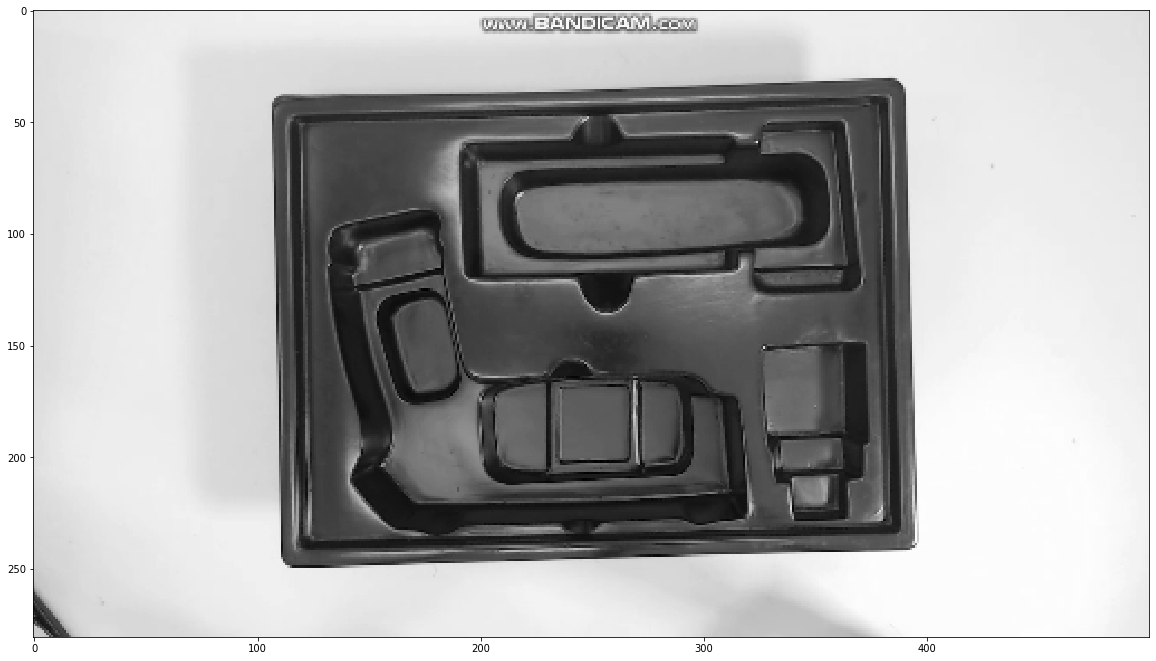

In [50]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize = (20,15))
plt.imshow(image,cmap=cm.gray)
plt.show()

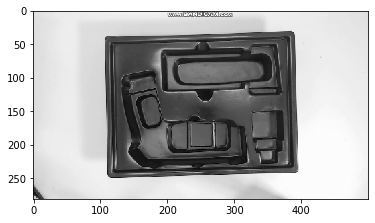

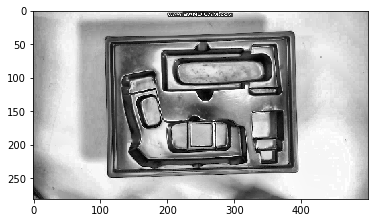

In [58]:
result=image
#result = cv2.fastNlMeansDenoising(image,None,20,7,21)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))
result2 = clahe.apply(result)

plt.figure(1)
plt.imshow(result,cmap=cm.gray)

plt.figure(2)
plt.imshow(result2,cmap=cm.gray)
plt.show()

## A primeira etapa para detectar a bandeja é :

### Remover ruídos
      
- Binarizar
- Efeito de Blur
    
### Detectar o contorno

### Comparar contornos
- Calcular momento
- Calcular momento de Hu
- Normalizar escala de valores
- Calcular distancia entre os contornos

In [59]:
# Threshold image
_,im = cv2.threshold(image, 60, 80, cv2.THRESH_BINARY_INV)
# Efeito de Blur
im = cv2.GaussianBlur(im, (25, 25), 0)

In [60]:
# Calculate Moments
moments = cv2.moments(im)
print('Momento \n\n',moments)

# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)
print('\nMomento de hu \n\n',huMoments)

from math import copysign, log10
# Log scale hu moments
for i in range(0,7):
  huMoments[i] = -1* copysign(1.0,huMoments[i])*log10(abs(huMoments[i]))
print('\nMomento de hu normalizado \n\n',huMoments)

Momento 

 {'m00': 1498537.0, 'm10': 373830415.0, 'm01': 221743151.0, 'm20': 103425449151.0, 'm11': 54599679279.0, 'm02': 38793911327.0, 'm30': 30829394167981.0, 'm21': 14961488998489.0, 'm12': 9489023672839.0, 'm03': 7476403894205.0, 'mu20': 10168372963.31012, 'mu11': -717162521.8615494, 'mu02': 5981891993.87122, 'mu30': -44766928593.67969, 'mu21': 15117529520.85669, 'mu12': 23596915880.554688, 'mu03': -34369144157.700195, 'nu20': 0.0045281053893544854, 'nu11': -0.00031936156275951655, 'nu02': 0.002663812339862009, 'nu30': -1.6285032244084556e-05, 'nu21': 5.49935998362883e-06, 'nu12': 8.583937921308211e-06, 'nu03': -1.2502591497616352e-05}

Momento de hu 

 [[ 7.19191773e-03]
 [ 3.88355581e-06]
 [ 2.60813537e-09]
 [ 1.08352105e-10]
 [-5.46071965e-20]
 [-4.97652957e-14]
 [-1.83246525e-20]]

Momento de hu normalizado 

 [[  2.14315529]
 [  5.41077045]
 [  8.58366987]
 [  9.96516265]
 [-19.26275012]
 [-13.30307341]
 [-19.73696425]]


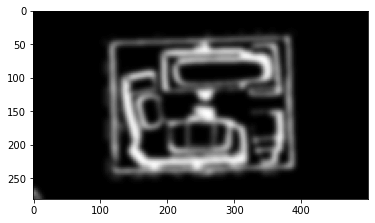

Comparação da bandeja com ela mesma  0.0


In [61]:
plt.imshow(im,cmap=cm.gray)
plt.show()
d1 = cv2.matchShapes(im,im,cv2.CONTOURS_MATCH_I1,0)
print('Comparação da bandeja com ela mesma ',d1)

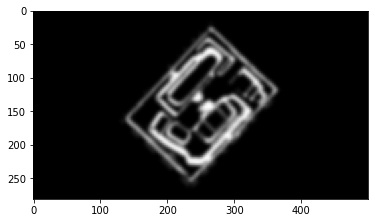

Comparação da bandeja transformada  0.0015731976182055685


In [62]:
(h, w) = im.shape[:2]
# calculate the center of the image
center = (w / 2, h / 2)
scale = 0.7
angle180 = 45.0
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
im2 = cv2.warpAffine(im, M, (w, h))

plt.imshow(im2,cmap=cm.gray)
plt.show()
d1 = cv2.matchShapes(im,im2,cv2.CONTOURS_MATCH_I1,0)
print('Comparação da bandeja transformada ',d1)

## Como alternativa ao contorno temos:

- Canny
- Canny ajustado
- Sobel

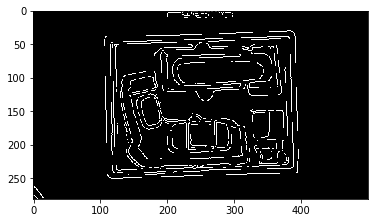

In [63]:
temp=image.copy()
temp = cv2.GaussianBlur(temp, (5,5), 0)
edges = cv2.Canny(temp,10,200)
plt.imshow(edges,cmap=cm.gray)
plt.show()

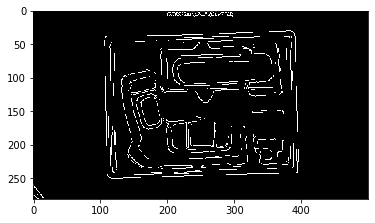

In [64]:
edges = cv2.Canny(image,225,250)
plt.imshow(edges,cmap=cm.gray)
plt.show()

In [65]:
import numpy as np
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

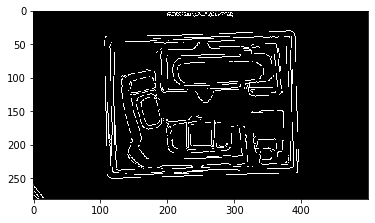

In [66]:
edges = auto_canny(image)
plt.imshow(edges,cmap=cm.gray)
plt.show()

## Detectar contorno

We use the functions: ***cv.findContours*** (image, contours, hierarchy, mode, method, offset = new cv.Point(0, 0))

Parameters:

- image	source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary.

- contours	detected contours.

- hierarchy	containing information about the image topology. It has as many elements as the number of contours.

- mode	contour retrieval mode(see cv.RetrievalModes).

- method	contour approximation method(see cv.ContourApproximationModes).

- offset	optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.


---------------------------------------------------------------------

***cv.drawContours*** (image, contours, contourIdx, color, thickness = 1, lineType = cv.LINE_8, hierarchy = new cv.Mat(), maxLevel = INT_MAX, offset = new cv.Point(0, 0))

Parameters:

- image	destination image.
- contours	all the input contours.

- contourIdx	parameter indicating a contour to draw. If it is negative, all the contours are drawn.

- color	color of the contours.
- thickness	thickness of lines the contours are drawn with. If it is negative, the contour interiors are drawn.

- lineType	line connectivity(see cv.LineTypes).

- hierarchy	optional information about hierarchy. It is only needed if you want to draw only some of the contours(see 
maxLevel).

- maxLevel	maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws 
the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.

- offset	optional contour shift parameter.

output_shape_number_1.jpg
output_shape_number_2.jpg
output_shape_number_3.jpg
output_shape_number_4.jpg
output_shape_number_5.jpg
output_shape_number_6.jpg
output_shape_number_7.jpg
output_shape_number_8.jpg
output_shape_number_9.jpg
output_shape_number_10.jpg
output_shape_number_11.jpg
output_shape_number_12.jpg
output_shape_number_13.jpg
output_shape_number_14.jpg


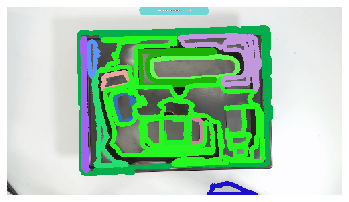

In [88]:
import numpy as np
import cv2 as cv
import random
im = cv.imread("./data/2.png")
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

clahe = cv.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))
cl1 = clahe.apply(imgray)
imgray=cl1

#imgray = cv.GaussianBlur(imgray, (9, 9), 0)
ret, thresh = cv.threshold(imgray, 100, 255, cv.THRESH_BINARY_INV)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv2.CHAIN_APPROX_NONE)
i=0
for contour in contours:
    area = cv2.contourArea(contour)
    if(area>400):
        i=i+1
        rgb = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
       
        accuracy = 0.03 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, accuracy, True)
        
        cv.drawContours(im, contour, -3, rgb, 5)
        salva_img_contorno(contour,im,i)
plt.imshow(im)
plt.axis("off");

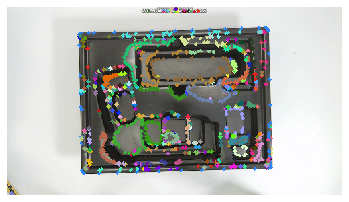

In [14]:
import numpy as np
import cv2 as cv
import random
im = cv.imread("./data/2.png")
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
#imgray = cv.GaussianBlur(imgray, (9, 9), 0)
ret, thresh = cv.threshold(imgray, 100, 255, cv.THRESH_BINARY_INV)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    rgb = [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    cv.drawContours(im, contour, -3, rgb, 3)
plt.imshow(im)
plt.axis("off");

## Exemplo
No exemplo calcularemos em duas imagem :
- O contorno
- Os momentos invariantes
- O Centroid do contorno

(281, 500)
0.0
246 150 2075955.0
[[ 5.69445730e-03]
 [ 2.85891435e-06]
 [ 1.25874475e-09]
 [ 3.90408598e-10]
 [-2.46124426e-19]
 [-4.13845821e-14]
 [-1.19687832e-19]]


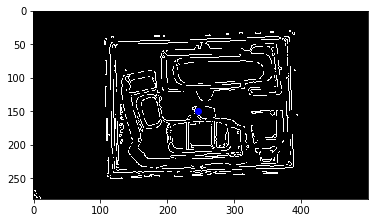

In [69]:
import numpy as np
temp=cv2.imread("./data/2.png",0)


print(temp.shape)
_,temp = cv2.threshold(temp, 60, 80, cv2.THRESH_BINARY_INV)

im = cv2.GaussianBlur(temp, (5,5), 0)
edges1 = auto_canny(im)

d1 = cv2.matchShapes(edges1,edges1,cv2.CONTOURS_MATCH_I1,0)

plt.imshow(edges1,cmap=cm.gray)
print(d1)

# Calculate Moments
M = cv2.moments(edges1)
 
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX,cY,M["m00"])
plt.plot(cX,cY, 'bo')
# Calculate Hu Moments
huMoments = cv2.HuMoments(M)
print(huMoments)
plt.show()

0.028140594888461046
290 136 1903575.0
[[ 3.85091449e-03]
 [ 1.11275870e-06]
 [ 2.63974118e-10]
 [ 5.81466081e-11]
 [-4.90807475e-21]
 [-5.73980265e-14]
 [ 5.27322257e-21]]


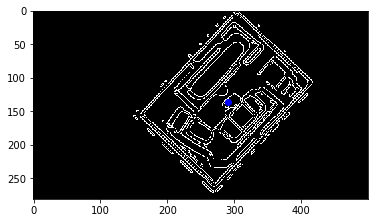

In [17]:
image=cv2.imread("./data/2.png",0)
_,im = cv2.threshold(image, 60, 80, cv2.THRESH_BINARY_INV)
im = cv2.GaussianBlur(im, (5, 5), 0)

temp= im.copy()
(h, w) = temp.shape[:2]
# calculate the center of the image
center = (w / 2, h / 2)
scale = 0.8
angle180 = 45.0
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = np.float32([[1,0,40],[0,1,25]])
temp = cv2.warpAffine(temp, M, (w, h))
M = cv2.getRotationMatrix2D(center, angle180, scale)
temp = cv2.warpAffine(temp, M, (w, h))
#plt.imshow(temp,cmap=cm.gray)


edges2 = auto_canny(temp)

d1 = cv2.matchShapes(edges1,edges2,cv2.CONTOURS_MATCH_I1,0)
print(d1)

plt.imshow(edges2,cmap=cm.gray)

# Calculate Moments
M = cv2.moments(edges2)
 
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX,cY,M["m00"])
plt.plot(cX,cY, 'bo')
# Calculate Hu Moments
huMoments = cv2.HuMoments(M)
print(huMoments)
plt.show()

### Experimento alternativo

A ideia é calcular a diferença da imagem  de fundo que é a mesa

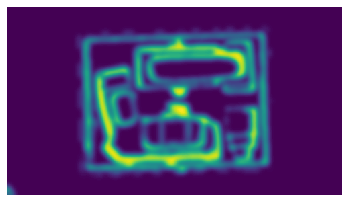

In [40]:
image = cv2.imread("./data/2.png",cv2.IMREAD_GRAYSCALE)
fundo = cv2.imread("./data/1.png",cv2.IMREAD_GRAYSCALE)


_,im = cv2.threshold(image,60, 90, cv2.THRESH_BINARY_INV)
im = cv2.GaussianBlur(im, (25, 25), 0)

_,fd = cv2.threshold(fundo, 0, 40,cv2.THRESH_BINARY_INV)

diferenca = cv2.absdiff(im,fd) 
plt.axis("off");
plt.imshow(diferenca)
plt.show()

### Bibliografia auxiliar
https://medium.com/analytics-vidhya/tutorial-how-to-scale-and-rotate-contours-in-opencv-using-python-f48be59c35a2
 
https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/

https://www.learnopencv.com/shape-matching-using-hu-moments-c-python/

https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/